In [1]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import time
import matplotlib.pyplot as plt
import sys
import math

In [2]:
def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5)
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [3]:
data, data_out = dt._get_cup('train')
test_split = 0.2
test_len = int(len(data)*test_split)
test, test_out = data[:test_len, :], data_out[:test_len, :]
test_out1, test_out2 = test_out[:, 0], test_out[:, 1]
dev_set, dev_out = data[test_len:, :], data_out[test_len:, :]
dev_out1, dev_out2 = dev_out[:, 0], dev_out[:, 1]

# LINEAR

Training first model ... 


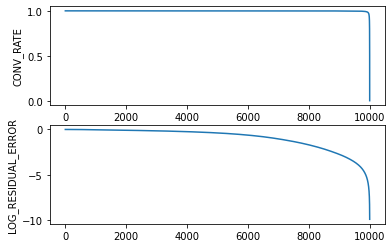

SUM OF eps-LOSS: 22214.74963902153
DEVSET MEE: 3.4877483921642205


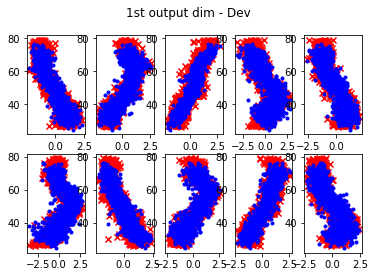

Testing the model
SUM OF eps-LOSS: 5737.208497210316
TEST MEE: 3.5881457363511746


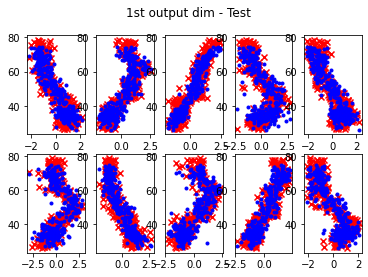

In [4]:
cup_model = SVR('linear', box=0.1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


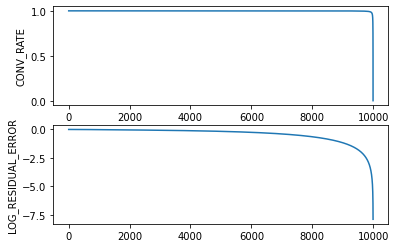

SUM OF eps-LOSS: 21932.783200678023
DEVSET MEE: 3.471615874530804


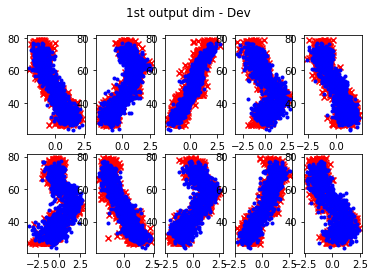

Testing the model
SUM OF eps-LOSS: 5785.7228004880835
TEST MEE: 3.593330990606231


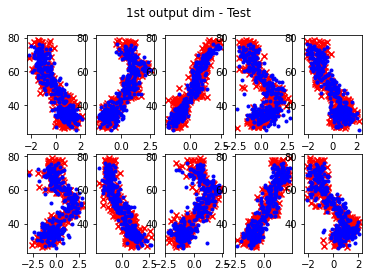

In [5]:
cup_model1 = SVR('linear', box=1)
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


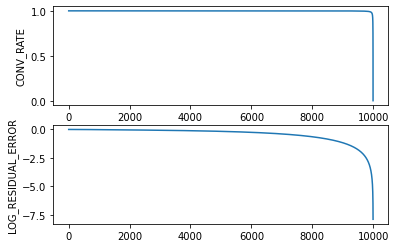

SUM OF eps-LOSS: 21932.783200678492
DEVSET MEE: 3.4716158745308086


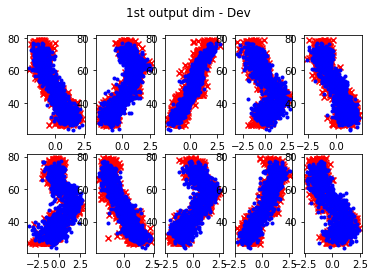

Testing the model
SUM OF eps-LOSS: 5785.72280048789
TEST MEE: 3.5933309906060615


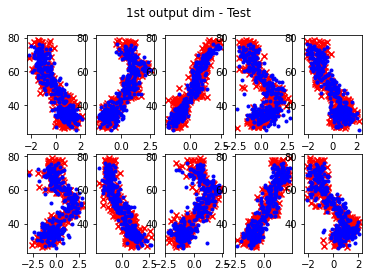

In [6]:
cup_model2 = SVR('linear', box=10)
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08207142558242436, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [7]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

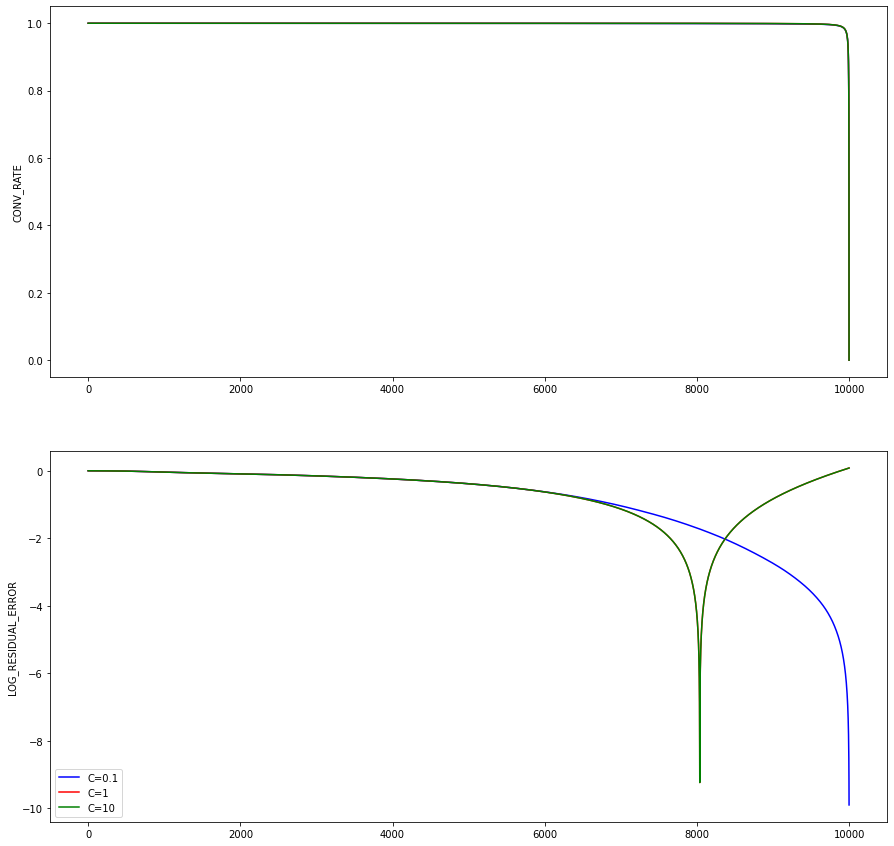

In [8]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
    plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - cup_model1.history['fstar']) / (cup_model1.history['f'][i] - cup_model1.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - cup_model2.history['fstar']) / (cup_model2.history['f'][i] - cup_model2.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
plt.legend()
plt.show()



In [9]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-359.05841615992006,
 -748.9768908799205,
 -748.9768908796838,
 array([0.91160528, 0.91088006, 0.91088006]))

# POLY

Training first model ... 


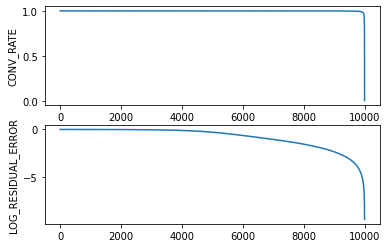

SUM OF eps-LOSS: 28107.018692607566
DEVSET MEE: 3.540656309250961


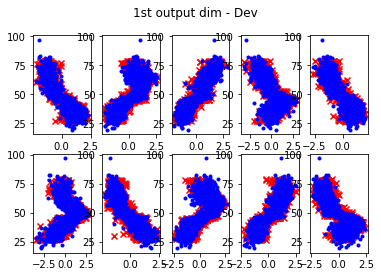

Testing the model
SUM OF eps-LOSS: 6576.41171657481
TEST MEE: 3.5245022730475113


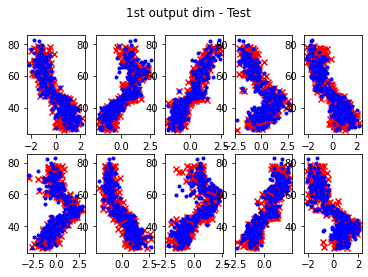

In [10]:
cup_model = SVR('poly', box=0.1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


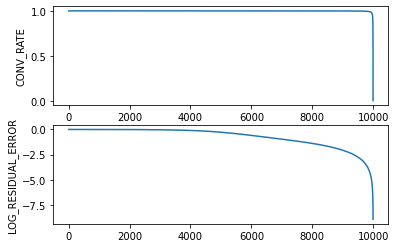

SUM OF eps-LOSS: 27385.7766301587
DEVSET MEE: 3.4888170355455004


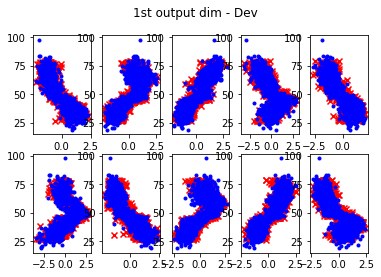

Testing the model
SUM OF eps-LOSS: 6411.944906203668
TEST MEE: 3.486544021826025


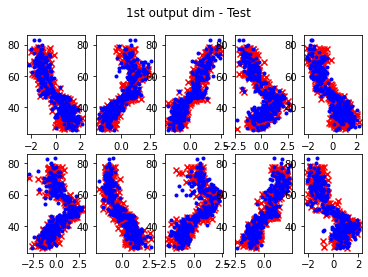

In [11]:
cup_model1 = SVR('poly', box=1, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


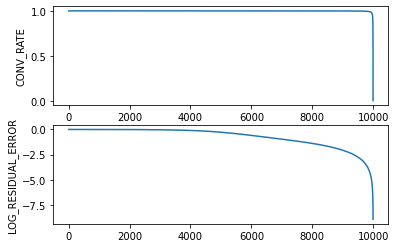

SUM OF eps-LOSS: 27385.77663015449
DEVSET MEE: 3.4888170355452583


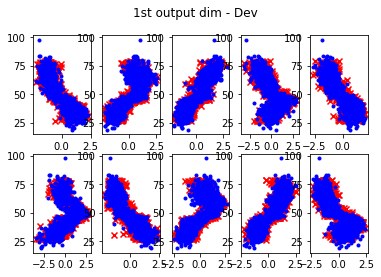

Testing the model
SUM OF eps-LOSS: 6411.94490620268
TEST MEE: 3.4865440218258157


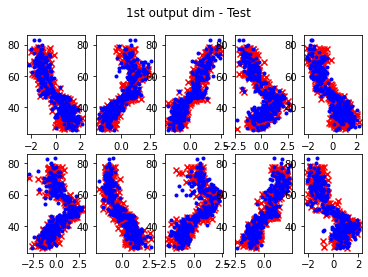

In [12]:
cup_model2 = SVR('poly', box=10, kernel_args={'gamma': 0.075, "degree": 3, "coef": 0.28009269588038244})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.020433983780727916, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [13]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

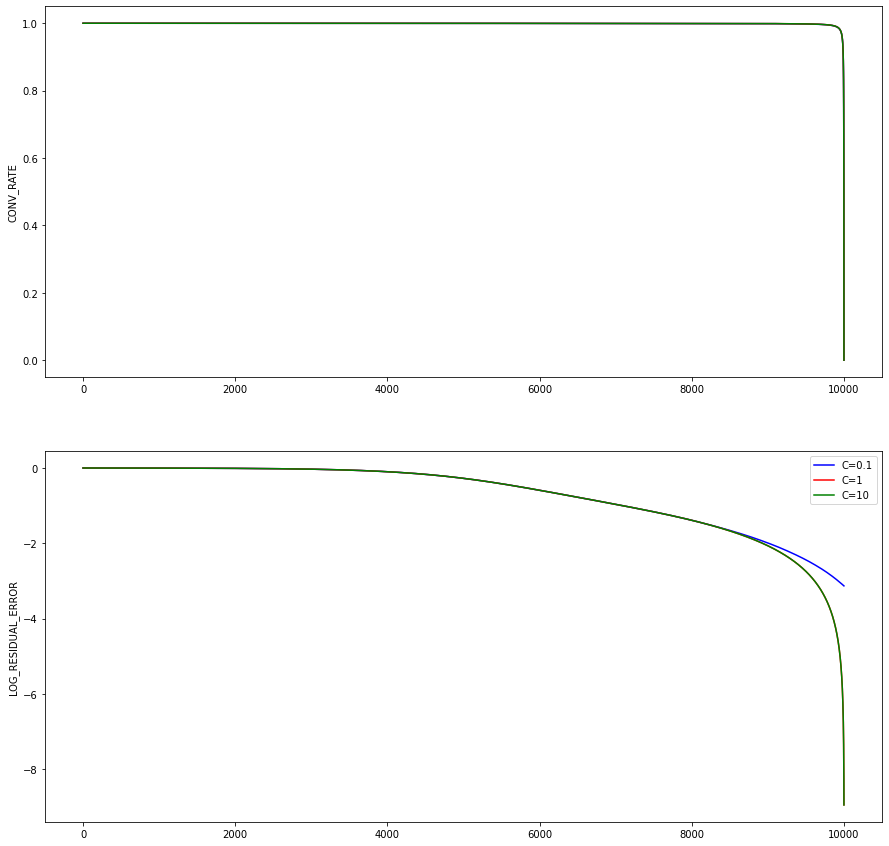

In [14]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
    plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - cup_model1.history['fstar']) / (cup_model1.history['f'][i] - cup_model1.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - cup_model2.history['fstar']) / (cup_model2.history['f'][i] - cup_model2.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
plt.legend()
plt.show()



In [15]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-429.84275169462427,
 -449.447851748144,
 -449.44785174829656,
 array([0.89919999, 0.90167665, 0.90167665]))

# SIGMOID

Training first model ... 


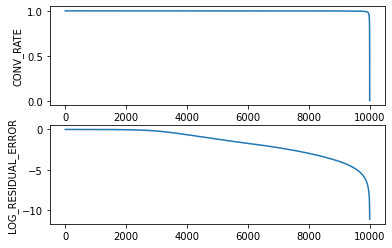

SUM OF eps-LOSS: 41483.41875076604
DEVSET MEE: 4.578218005625301


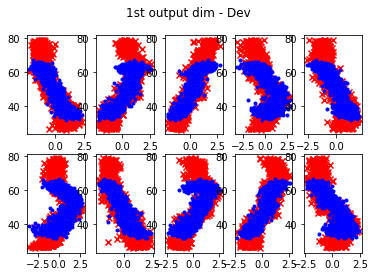

Testing the model
SUM OF eps-LOSS: 10124.246482917662
TEST MEE: 4.613346124445864


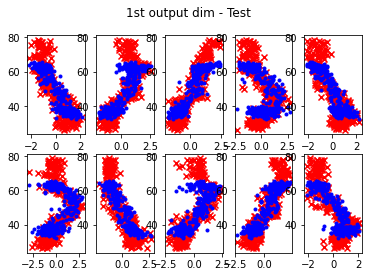

In [16]:
cup_model = SVR('sigmoid', box=0.1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


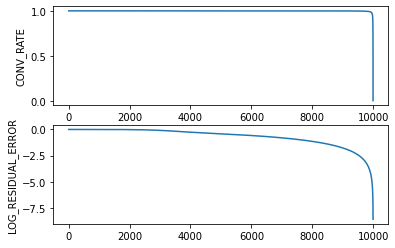

SUM OF eps-LOSS: 25731.25101849246
DEVSET MEE: 3.8227692928414427


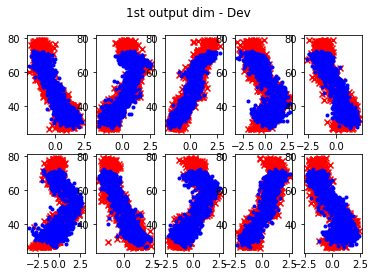

Testing the model
SUM OF eps-LOSS: 6706.104747615477
TEST MEE: 3.9554295748030417


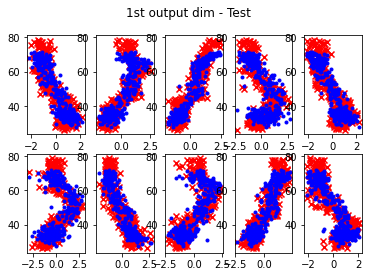

In [17]:
cup_model1 = SVR('sigmoid', box=1, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


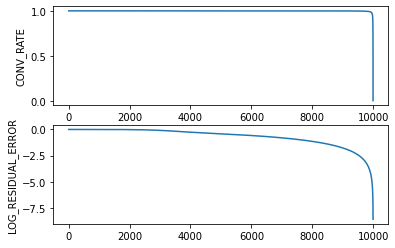

SUM OF eps-LOSS: 25731.251018493585
DEVSET MEE: 3.822769292841559


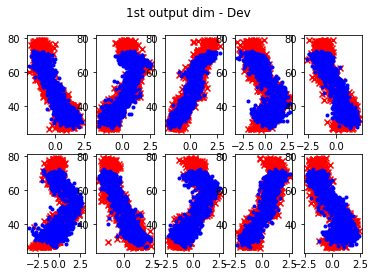

Testing the model
SUM OF eps-LOSS: 6706.104747615841
TEST MEE: 3.9554295748032104


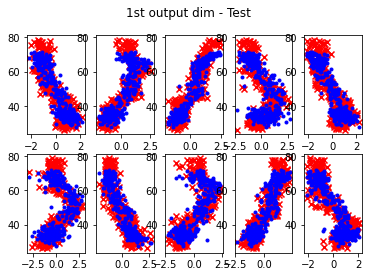

In [18]:
cup_model2 = SVR('sigmoid', box=10, kernel_args={'gamma': 0.05})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.03408724777854869, 'vareps': 0.5}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [19]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

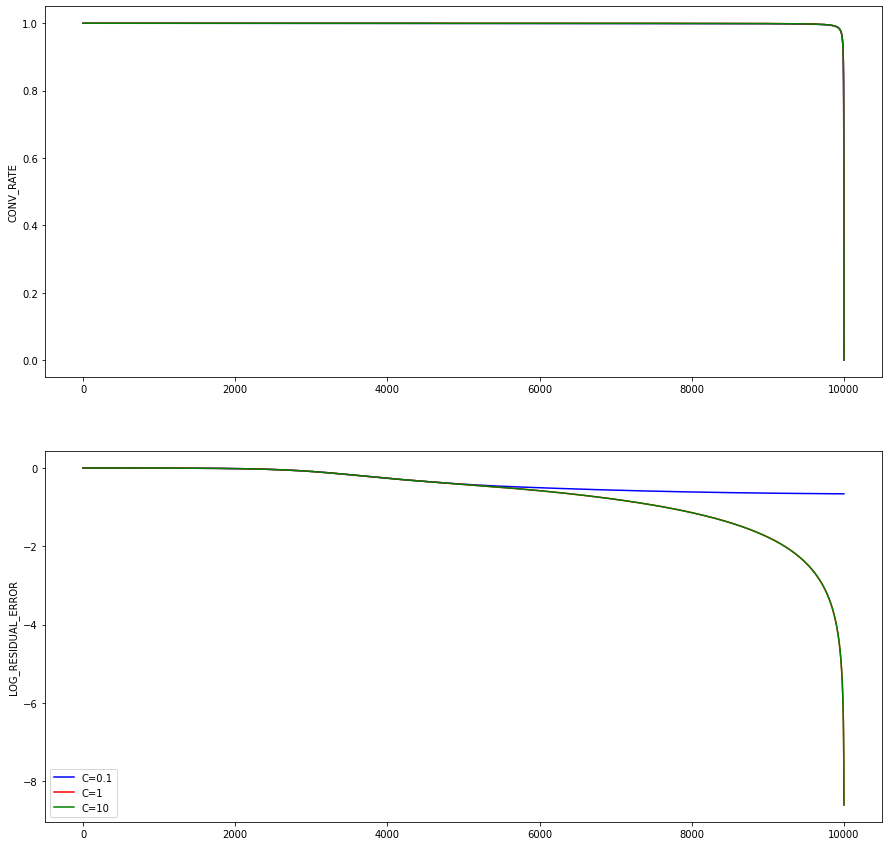

In [20]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
    plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - cup_model1.history['fstar']) / (cup_model1.history['f'][i] - cup_model1.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - cup_model2.history['fstar']) / (cup_model2.history['f'][i] - cup_model2.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
plt.legend()
plt.show()



In [21]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-680.9978433022317,
 -1409.9118733626647,
 -1409.9118733623532,
 array([0.84553016, 0.89688467, 0.89688467]))

# RBF

Training first model ... 


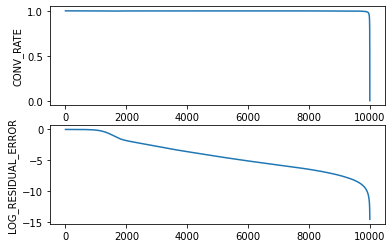

SUM OF eps-LOSS: 28407.860501268384
DEVSET MEE: 3.5631228213785553


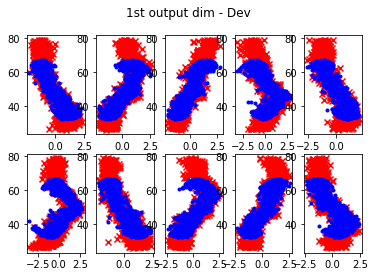

Testing the model
SUM OF eps-LOSS: 6710.081989635014
TEST MEE: 3.480236487549521


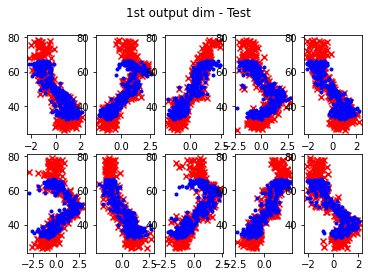

In [22]:
cup_model = SVR('rbf', box=0.1, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


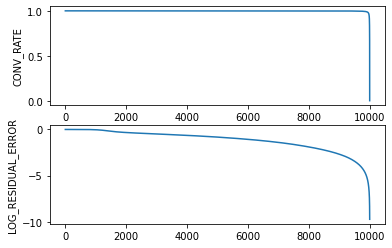

SUM OF eps-LOSS: 6927.320517183722
DEVSET MEE: 1.8731717846202889


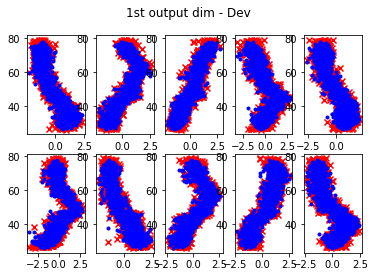

Testing the model
SUM OF eps-LOSS: 1951.6156201270592
TEST MEE: 1.9622113059548563


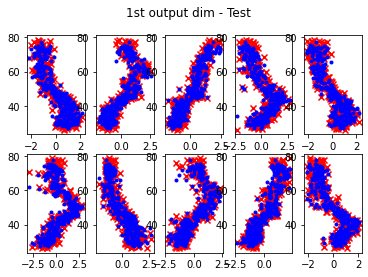

In [23]:
cup_model1 = SVR('rbf', box=1.0, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model1.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model1.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model1, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model1.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model1, test, test_out1, testpred_1, text='1st output dim - Test')

Training first model ... 


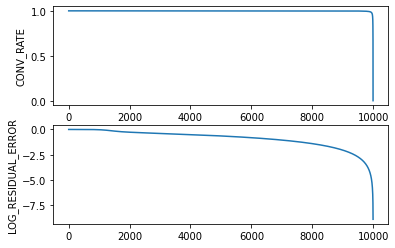

SUM OF eps-LOSS: 6437.373458342453
DEVSET MEE: 1.833831161659371


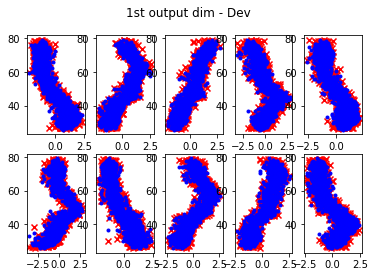

Testing the model
SUM OF eps-LOSS: 1900.2287004212594
TEST MEE: 1.9496214745329332


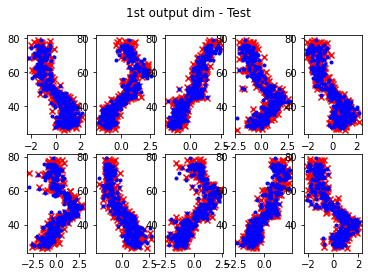

In [28]:
cup_model2 = SVR('rbf', box=10, kernel_args={'gamma': 0.1})
# Train over the entire dev_set
print("Training first model ... ")
cup_model2.fit(dev_set, dev_out1, optim_args={'eps': 0.08737368906085892, 'vareps': 0.1}, optim_verbose=False, convergence_verbose=True)
pred_1 = [float(cup_model2.predict(dev_set[i])) for i in range(dev_set.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(dev_out1, pred_1))
mee = 0
for i in range(len(pred_1)):
    mee += math.sqrt((dev_out1[i] - pred_1[i])**2)
mee = mee/len(pred_1)
print(f"DEVSET MEE: {mee}")
plot_svr_predict(cup_model2, dev_set, dev_out1, pred_1, text='1st output dim - Dev')
# Test the final model
print("Testing the model")
testpred_1 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
print("SUM OF eps-LOSS:", cup_model2.eps_ins_loss(test_out1, testpred_1))
mee = 0
for i in range(len(testpred_1)):
    mee += math.sqrt((test_out1[i] - testpred_1[i])**2)
mee = mee/len(testpred_1)
print(f"TEST MEE: {mee}")
plot_svr_predict(cup_model2, test, test_out1, testpred_1, text='1st output dim - Test')

In [29]:
from sklearn.metrics import r2_score
testpred_model_0 = [float(cup_model.predict(test[i])) for i in range(test.shape[0])]
testpred_model_1 = [float(cup_model1.predict(test[i])) for i in range(test.shape[0])]
testpred_model_2 = [float(cup_model2.predict(test[i])) for i in range(test.shape[0])]
rscores = np.array([r2_score(test_out1, testpred_model_0), r2_score(test_out1, testpred_model_1), r2_score(test_out1, testpred_model_2)])

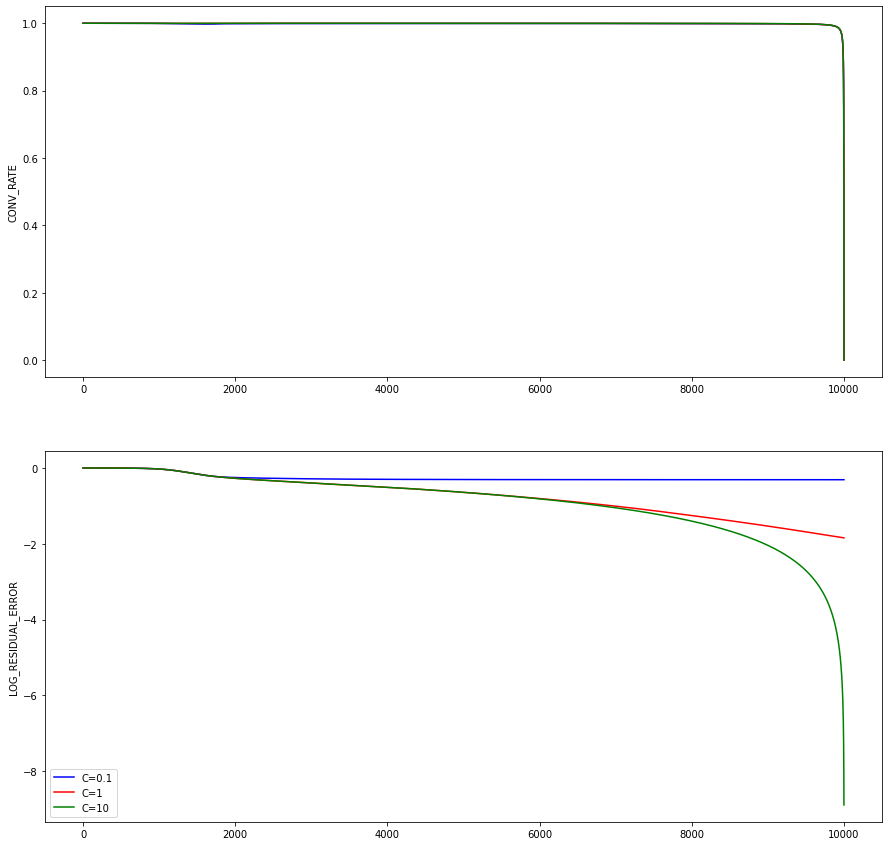

In [30]:
fstar = cup_model.history['fstar'] if np.argmax(rscores) == 0 else cup_model1.history['fstar'] if np.argmax(rscores) == 1 else cup_model2.history['fstar']
fig, axs = plt.subplots(2, figsize=(15,15))
colors = ['blue', 'red', 'green']
plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model.history['f']) - 1):
    plot_conv_rate.append((cup_model.history['f'][i+1] - cup_model.history['fstar']) / (cup_model.history['f'][i] - cup_model.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[0])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=0.1', color=colors[0])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model1.history['f']) - 1):
    plot_conv_rate.append((cup_model1.history['f'][i+1] - cup_model1.history['fstar']) / (cup_model1.history['f'][i] - cup_model1.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model1.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[1])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=1', color=colors[1])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")

plot_conv_rate = []
log_residual_error = []
for i in range(len(cup_model2.history['f']) - 1):
    plot_conv_rate.append((cup_model2.history['f'][i+1] - cup_model2.history['fstar']) / (cup_model2.history['f'][i] - cup_model2.history['fstar']))
    log_residual_error.append(np.log(np.abs(cup_model2.history['f'][i] - fstar) / np.abs(fstar)))
axs[0].plot(range(len(plot_conv_rate)), plot_conv_rate, color=colors[2])
axs[0].set_ylabel("CONV_RATE")
axs[1].plot(range(len(log_residual_error)), log_residual_error, label='C=10', color=colors[2])
axs[1].set_ylabel("LOG_RESIDUAL_ERROR")
plt.legend()
plt.show()



In [31]:
cup_model.history['fstar'], cup_model1.history['fstar'], cup_model2.history['fstar'], rscores

(-759.9427610113543,
 -2406.767012081502,
 -2858.57612563134,
 array([0.89725481, 0.96929047, 0.97006524]))